In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
training_data = pd.read_csv("../Data/aps_failure_training_set.csv",na_values="na")
training_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Preprocessing

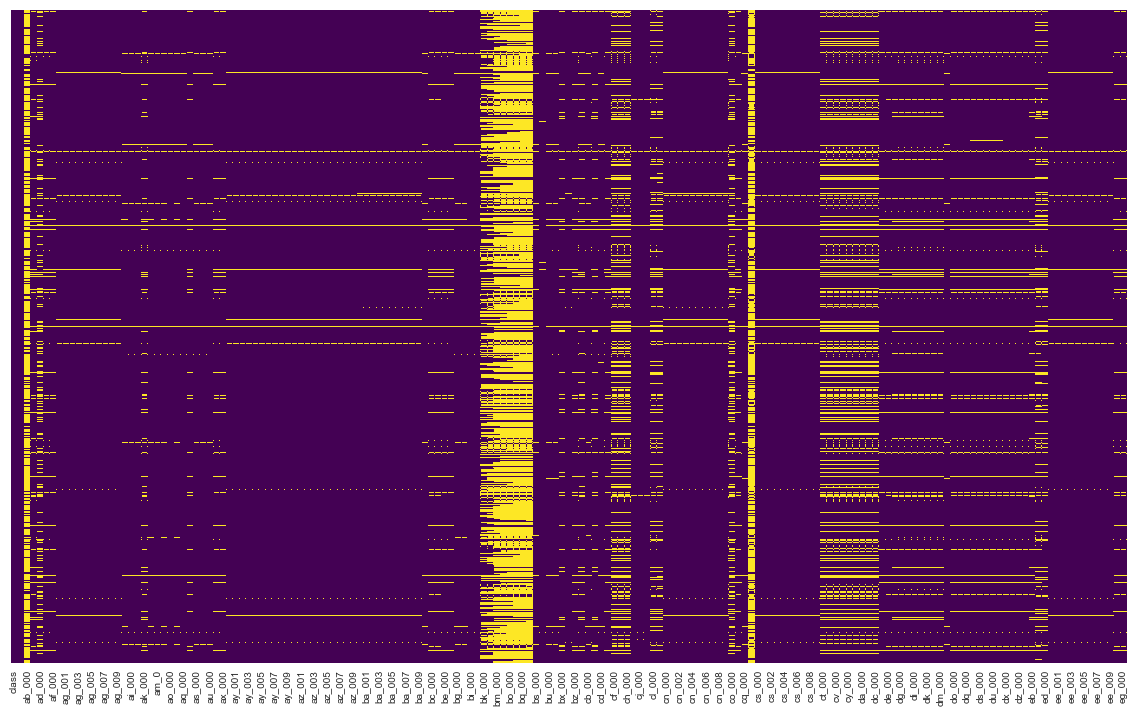

In [3]:
plt.figure(figsize=(20,12))
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

# Missing value handling

We are going to use different approches with missing values:

1. Removing the column having 80% missing values (**Self intuition)
2. Keeping all the features
3. Later, we will try to implement some feature engineering 


**For the rest of the missing values, we are replacing them with their mean() for now (**Ref) 

<big><b>Second Approach</b>

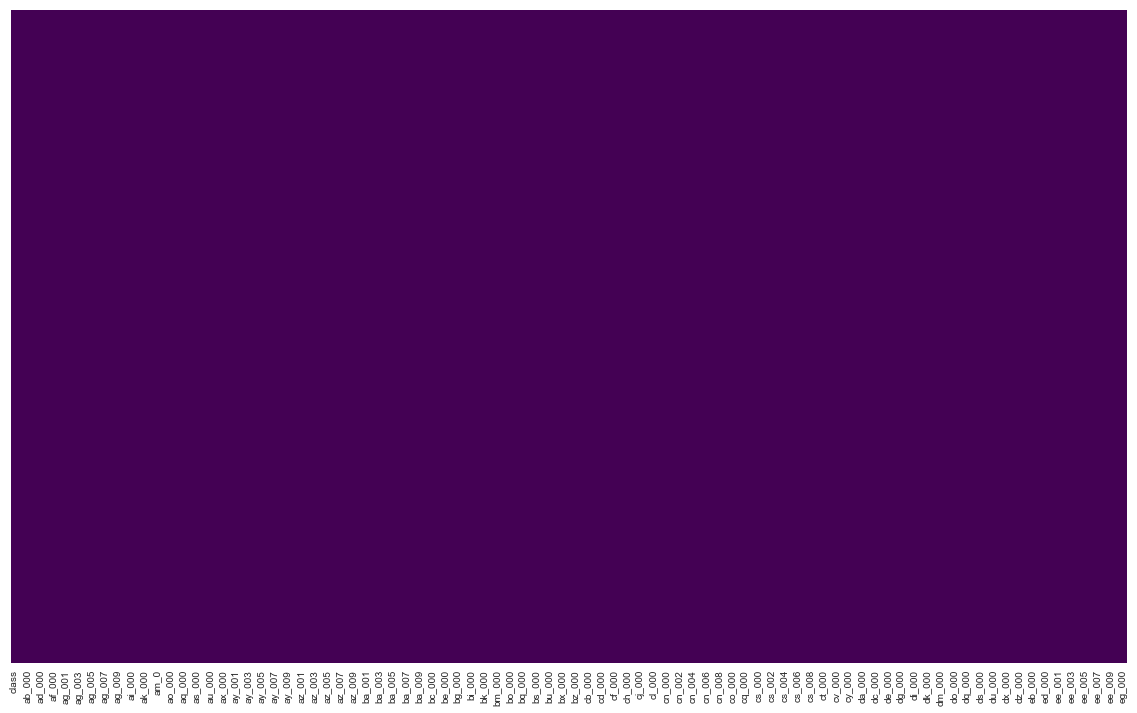

In [4]:
sample_training_data = training_data
sample_training_data.fillna(sample_training_data.mean(),inplace=True)

#after replacing with mean()

plt.figure(figsize=(20,12))
sns.heatmap(sample_training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
#as all the other values are numerical except Class column so we can replace them with 1 and 0

sample_training_data = sample_training_data.replace('neg',0)
sample_training_data = sample_training_data.replace('pos',1)

sample_training_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Testing Data preprocessing

In [6]:
testing_data = pd.read_csv("../Data/aps_failure_test_set.csv",na_values="na")
testing_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


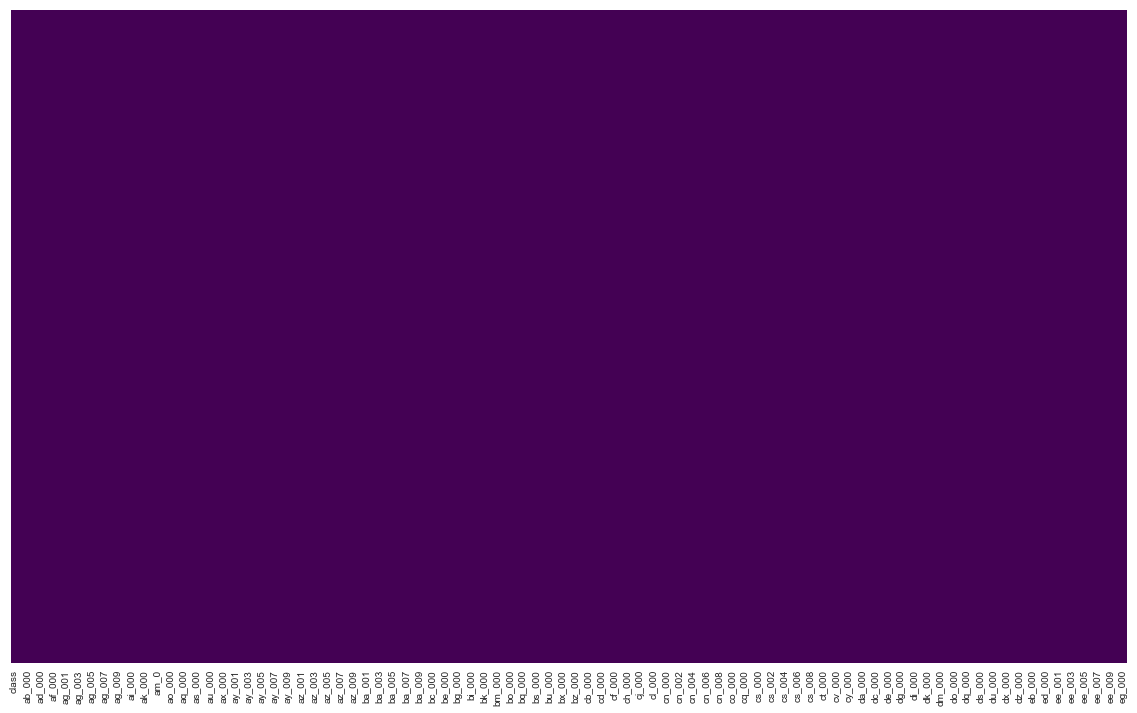

In [7]:
sample_testing_data = testing_data
sample_testing_data.fillna(sample_testing_data.mean(),inplace=True)

#after replacing with mean()

plt.figure(figsize=(20,12))
sns.heatmap(sample_testing_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#as all the other values are numerical except Class column so we can replace them with 1 and 0

sample_testing_data = sample_testing_data.replace('neg',0)
sample_testing_data = sample_testing_data.replace('pos',1)

sample_testing_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.000000,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.000000,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.000000,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,0.772065,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,0.772065,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


# Model implementation with Cross validation

In [9]:
X = sample_training_data.drop('class',axis=1)
y = sample_training_data['class']

In [10]:
CV_prediction = cross_val_predict(LogisticRegression(),X,y,cv = 5)
CV_score = cross_val_score(LogisticRegression(),X,y,cv = 5)

In [11]:
#mean cross validation score  
np.mean(CV_score)

0.98715

In [12]:
print(classification_report(y,CV_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     59000
           1       0.71      0.38      0.50      1000

   micro avg       0.99      0.99      0.99     60000
   macro avg       0.85      0.69      0.75     60000
weighted avg       0.99      0.99      0.99     60000



In [13]:
tn, fp, fn, tp = confusion_matrix(y, CV_prediction).ravel()
confusionData = [[tn,fp],[fn,tp]]
pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP'])

,FN,FP
TN,58846,154
TP,617,383


In [14]:
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,310040,154,617


<b> Improved  from approach 1 | type  2 fault decreases </b>

In [15]:
print(metrics.accuracy_score(y, CV_prediction)) #almost same

0.98715


In [16]:
print(metrics.r2_score(y, CV_prediction)) # improved

0.21593220338983077


In [17]:
print(metrics.f1_score(y, CV_prediction)) #improved

0.498373454782043


In [18]:
print(mean_squared_error(y,CV_prediction))

0.01285


In [19]:
CV_prediction = cross_val_predict(LogisticRegression(),X,y,cv = 10)
CV_score = cross_val_score(LogisticRegression(),X,y,cv = 10)

print(classification_report(y,CV_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     59000
           1       0.76      0.44      0.56      1000

   micro avg       0.99      0.99      0.99     60000
   macro avg       0.88      0.72      0.78     60000
weighted avg       0.99      0.99      0.99     60000



In [20]:
tn, fp, fn, tp = confusion_matrix(y, CV_prediction).ravel()
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,280860,136,559


In [21]:
print(metrics.accuracy_score(y, CV_prediction)) #almost same

0.9884166666666667


In [22]:
print(metrics.r2_score(y, CV_prediction)) # improved

0.293220338983051


In [23]:
print(metrics.f1_score(y, CV_prediction)) #improved

0.559289790741915


In [24]:
print(mean_squared_error(y,CV_prediction))

0.011583333333333333


# Try with test train split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
logmodel = LogisticRegression()

In [27]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
regularPrediction = logmodel.predict(X_test)

In [29]:
print(classification_report(y_test,regularPrediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17691
           1       0.45      0.34      0.39       309

   micro avg       0.98      0.98      0.98     18000
   macro avg       0.72      0.67      0.69     18000
weighted avg       0.98      0.98      0.98     18000



In [30]:
print(metrics.accuracy_score(y_test, regularPrediction))

0.9816666666666667


In [31]:
print(metrics.r2_score(y_test, regularPrediction)) # as the ans is negative , so reverese correlation

-0.0866147177024359


In [32]:
print(metrics.f1_score(y_test, regularPrediction))

0.3888888888888889


In [33]:
#testing error
print(metrics.mean_squared_error(y_test, regularPrediction)) 

0.018333333333333333


In [34]:
#Training error
temp = logmodel.predict(X_train)
mean_squared_error(y_train,temp)

0.01519047619047619

In [35]:
#confusion matrix
print(confusion_matrix(y_test,regularPrediction))

[[17565   126]
 [  204   105]]


In [36]:
tn, fp, fn, tp = confusion_matrix(y_test,regularPrediction).ravel()
confusionData = [[tn,fp],[fn,tp]]
pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP'])

,FN,FP
TN,17565,126
TP,204,105


In [37]:
#without modified threshold
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,103260,126,204


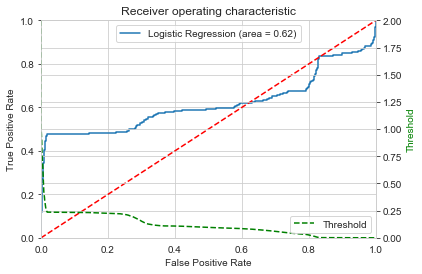

In [38]:
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="upper center")
plt.savefig('Log_ROC')


# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='g',linestyle='dashed', color='g',label = 'Threshold')
ax2.set_ylabel('Threshold',color='g')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
plt.legend(loc="lower right")
plt.savefig('roc_and_threshold.png')
plt.show()

In [39]:
#wtih different threshold
THRESHOLD = 0.253 #optimal one chosen manually

thresholdPrediction = np.where(logmodel.predict_proba(X_test)[:,1] > THRESHOLD, 1,0)


tn, fp, fn, tp = confusion_matrix(y_test,thresholdPrediction).ravel()
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,85290,279,165


# Testing Data implementation 

In [40]:
logmodel.fit(X,y)
testData_X = sample_testing_data.drop('class',axis=1)
testData_y = sample_testing_data['class']

In [41]:
#as the logmodel is already fitted with training data X_train and y_train so,
testDataPrediction = logmodel.predict(testData_X)

In [42]:
print(classification_report(testData_y,testDataPrediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.82      0.65      0.73       375

   micro avg       0.99      0.99      0.99     16000
   macro avg       0.91      0.82      0.86     16000
weighted avg       0.99      0.99      0.99     16000



In [43]:
print(metrics.accuracy_score(testData_y, testDataPrediction)) #improved

0.9885


In [44]:
print(metrics.r2_score(testData_y, testDataPrediction)) # improved

0.4975573333333333


In [45]:
print(metrics.f1_score(testData_y, testDataPrediction)) #improved

0.7270029673590503


In [46]:
#testing error
print(metrics.mean_squared_error(testData_y, testDataPrediction)) #testing error increased 

0.0115


In [47]:
#Training error
temp = logmodel.predict(X)
mean_squared_error(y,temp) 

0.008166666666666666

In [48]:
#confusion matrix
print(confusion_matrix(testData_y, testDataPrediction))

[[15571    54]
 [  130   245]]


In [49]:
tn, fp, fn, tp = confusion_matrix(testData_y, testDataPrediction).ravel()
confusionData = [[tn,fp],[fn,tp]]
pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP'])

,FN,FP
TN,15571,54
TP,130,245


In [73]:
#without modified threshold
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,65540,54,130


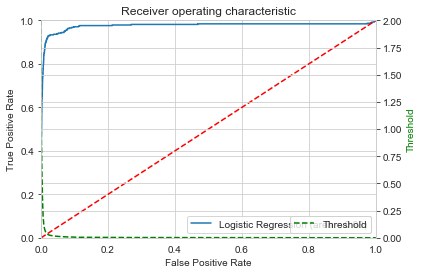

In [86]:
logit_roc_auc = roc_auc_score(testData_y, logmodel.predict_proba(testData_X)[:,1])
fpr, tpr, thresholds = roc_curve(testData_y,logmodel.predict_proba(testData_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')


# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='g',linestyle='dashed', color='g',label = 'Threshold')
ax2.set_ylabel('Threshold',color='g')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
plt.legend(loc="lower right")
plt.savefig('roc_and_threshold.png')
plt.show()

In [52]:
#wtih different threshold
THRESHOLD = 0.253 #optimal one chosen manually with test train split

thresholdTestingPrediction = np.where(logmodel.predict_proba(testData_X)[:,1] > THRESHOLD, 1,0)


testing_tn, testing_fp, testing_fn, testing_tp = confusion_matrix(testData_y,thresholdTestingPrediction).ravel()
testing_cost = 10*testing_fp+500*testing_fn
testing_values = {'Score':[testing_cost],'Number of Type 1 faults':[testing_fp],'Number of Type 2 faults':[testing_fn]}
pd.DataFrame(testing_values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,47860,86,94


# Final Score is 47860

In [53]:
len(thresholdTestingPrediction)

16000

In [54]:
print(metrics.accuracy_score(testData_y, thresholdTestingPrediction)) #improved

0.98875


In [55]:
print(metrics.r2_score(testData_y, thresholdTestingPrediction)) # improved

0.50848


In [56]:
print(metrics.f1_score(testData_y, thresholdTestingPrediction)) #improved

0.7574123989218328


In [57]:
#testing error
print(metrics.mean_squared_error(testData_y, thresholdTestingPrediction)) #testing error increased 

0.01125


In [58]:
print(metrics.recall_score(testData_y, thresholdTestingPrediction))

0.7493333333333333
